 ## Lead Scoring Case Study
X Education has appointed us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. 

### Data Understanding and Preparartion

In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [4]:
# Importing the dataset
leads = pd.read_csv('leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# no.of rows and columns
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function
leads[varlist] = leads[varlist].apply(binary_map)

In [10]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [11]:
# Checking all the unique values
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [12]:
# Replacing Select with NaN since it means that no option has been selected.
leads = leads.replace('Select',np.nan)

In [13]:
# checking for null values
round(leads.isnull().sum()*100/9240, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Removing all the columns that are no required and have 35% null values
leads = leads.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)


In [15]:
round(leads.isnull().sum()*100/len(leads),2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
# filling major null values with not available
leads['Specialization'] = leads['Specialization'].fillna('not available') 
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('not available')
leads['Country'] = leads['Country'].fillna('not available')
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('not available')

In [17]:
round(leads.isnull().sum()*100/len(leads),2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [18]:
# Categorizing all countries excluding India as outside india
def country(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not available":
        category = "not available"
    else:
        category = "outside india"
    return category

leads['Country'] = leads.apply(lambda x:country(x['Country']), axis = 1)
leads['Country'].value_counts()

India            6492
not available    2461
outside india     287
Name: Country, dtype: int64

In [19]:
leads.shape

(9240, 27)

In [20]:
# Removing minor null values rows
leads = leads[leads.isnull().sum(axis=1) <1]

In [21]:
leads.shape

(9074, 27)

In [22]:
leads.isnull().sum()

Prospect ID                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [23]:
# Changing 'google' to 'Google'
leads = leads.replace('google','Google')

In [24]:
# No.of unique values
for col in leads:
    print(leads[col].value_counts())
    print('************************************************************')

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64
************************************************************
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
************************************************************
Google               2873
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bi

In [25]:
# Grouping together the Catogorical columns
CA_col = ['Lead Origin','Lead Source','Do Not Email','Do Not Call','Converted','Last Activity','Country','Specialization',
         'What is your current occupation','What matters most to you in choosing a course','Search','Magazine',
          'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
         'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
          'I agree to pay the amount through cheque','A free copy of Mastering The Interview','Last Notable Activity']

In [26]:
# Converting them to categorical columns
for x in CA_col:
    leads[x] = leads[x].astype('category')

In [27]:
# numerical columns
num_col = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

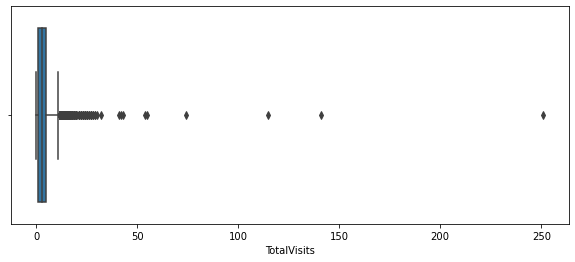

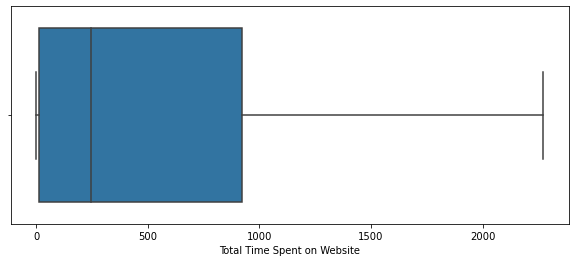

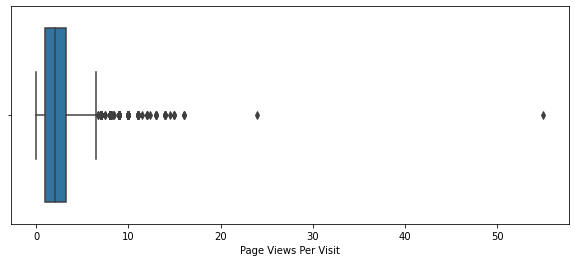

In [28]:
# Plotting Graph for Columns in num_col
for x in leads[num_col]:
    plt.figure(1,figsize=(10,4))
    sns.boxplot(leads[x])
    plt.xticks()
    plt.show()

In [29]:
# checking quantile values
leads.TotalVisits.quantile([0.5,0.7,0.9,0.95,0.99,0.999,0.9999,1])

0.5000      3.000
0.7000      4.000
0.9000      7.000
0.9500     10.000
0.9900     17.000
0.9990     31.854
0.9999    151.197
1.0000    251.000
Name: TotalVisits, dtype: float64

In [30]:
# Removing outliers beyond 0.999 quantile(10 columns were removed)
leads = leads[leads.TotalVisits<31]

In [31]:
leads['Page Views Per Visit'].quantile([0.5,0.7,0.9,0.95,0.99,0.999,0.9999,1])

0.5000     2.0000
0.7000     3.0000
0.9000     5.0000
0.9500     6.0000
0.9900     9.0000
0.9990    14.0000
0.9999    16.7496
1.0000    24.0000
Name: Page Views Per Visit, dtype: float64

In [32]:
# Removing outliers beyond 0.999 quantile(9 columns were removed)
leads = leads[leads['Page Views Per Visit']<14]

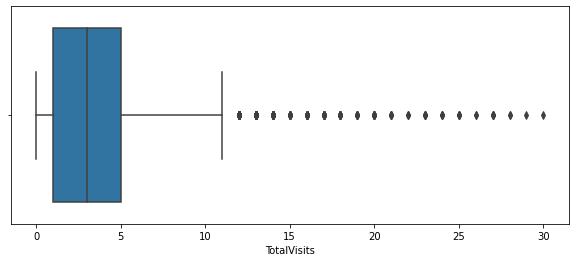

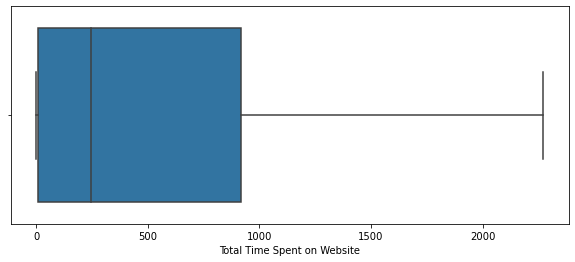

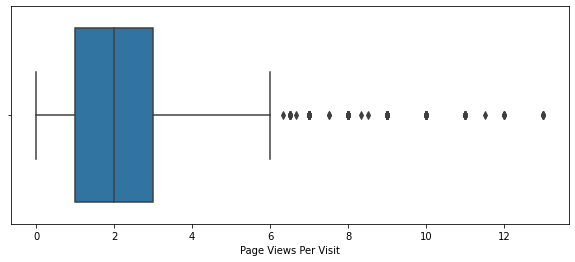

In [33]:
for x in leads[num_col]:
    plt.figure(1,figsize=(10,4))
    sns.boxplot(leads[x])
    plt.xticks()
    plt.show()

## EDA

In [34]:
# Removing Id values since they are unique for everyone
leads_final = leads.drop('Prospect ID',1)
leads_final.shape


(9046, 26)

In [35]:
leads_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9046 non-null   category
 1   Lead Source                                    9046 non-null   category
 2   Do Not Email                                   9046 non-null   category
 3   Do Not Call                                    9046 non-null   category
 4   Converted                                      9046 non-null   category
 5   TotalVisits                                    9046 non-null   float64 
 6   Total Time Spent on Website                    9046 non-null   int64   
 7   Page Views Per Visit                           9046 non-null   float64 
 8   Last Activity                                  9046 non-null   category
 9   Country                                  

In [36]:
# Checking Target variable 
leads_final.Converted.value_counts()

0    5620
1    3426
Name: Converted, dtype: int64

In [37]:
# Percentage of Target variable
leads_final.Converted.value_counts(normalize=True)

0    0.621269
1    0.378731
Name: Converted, dtype: float64

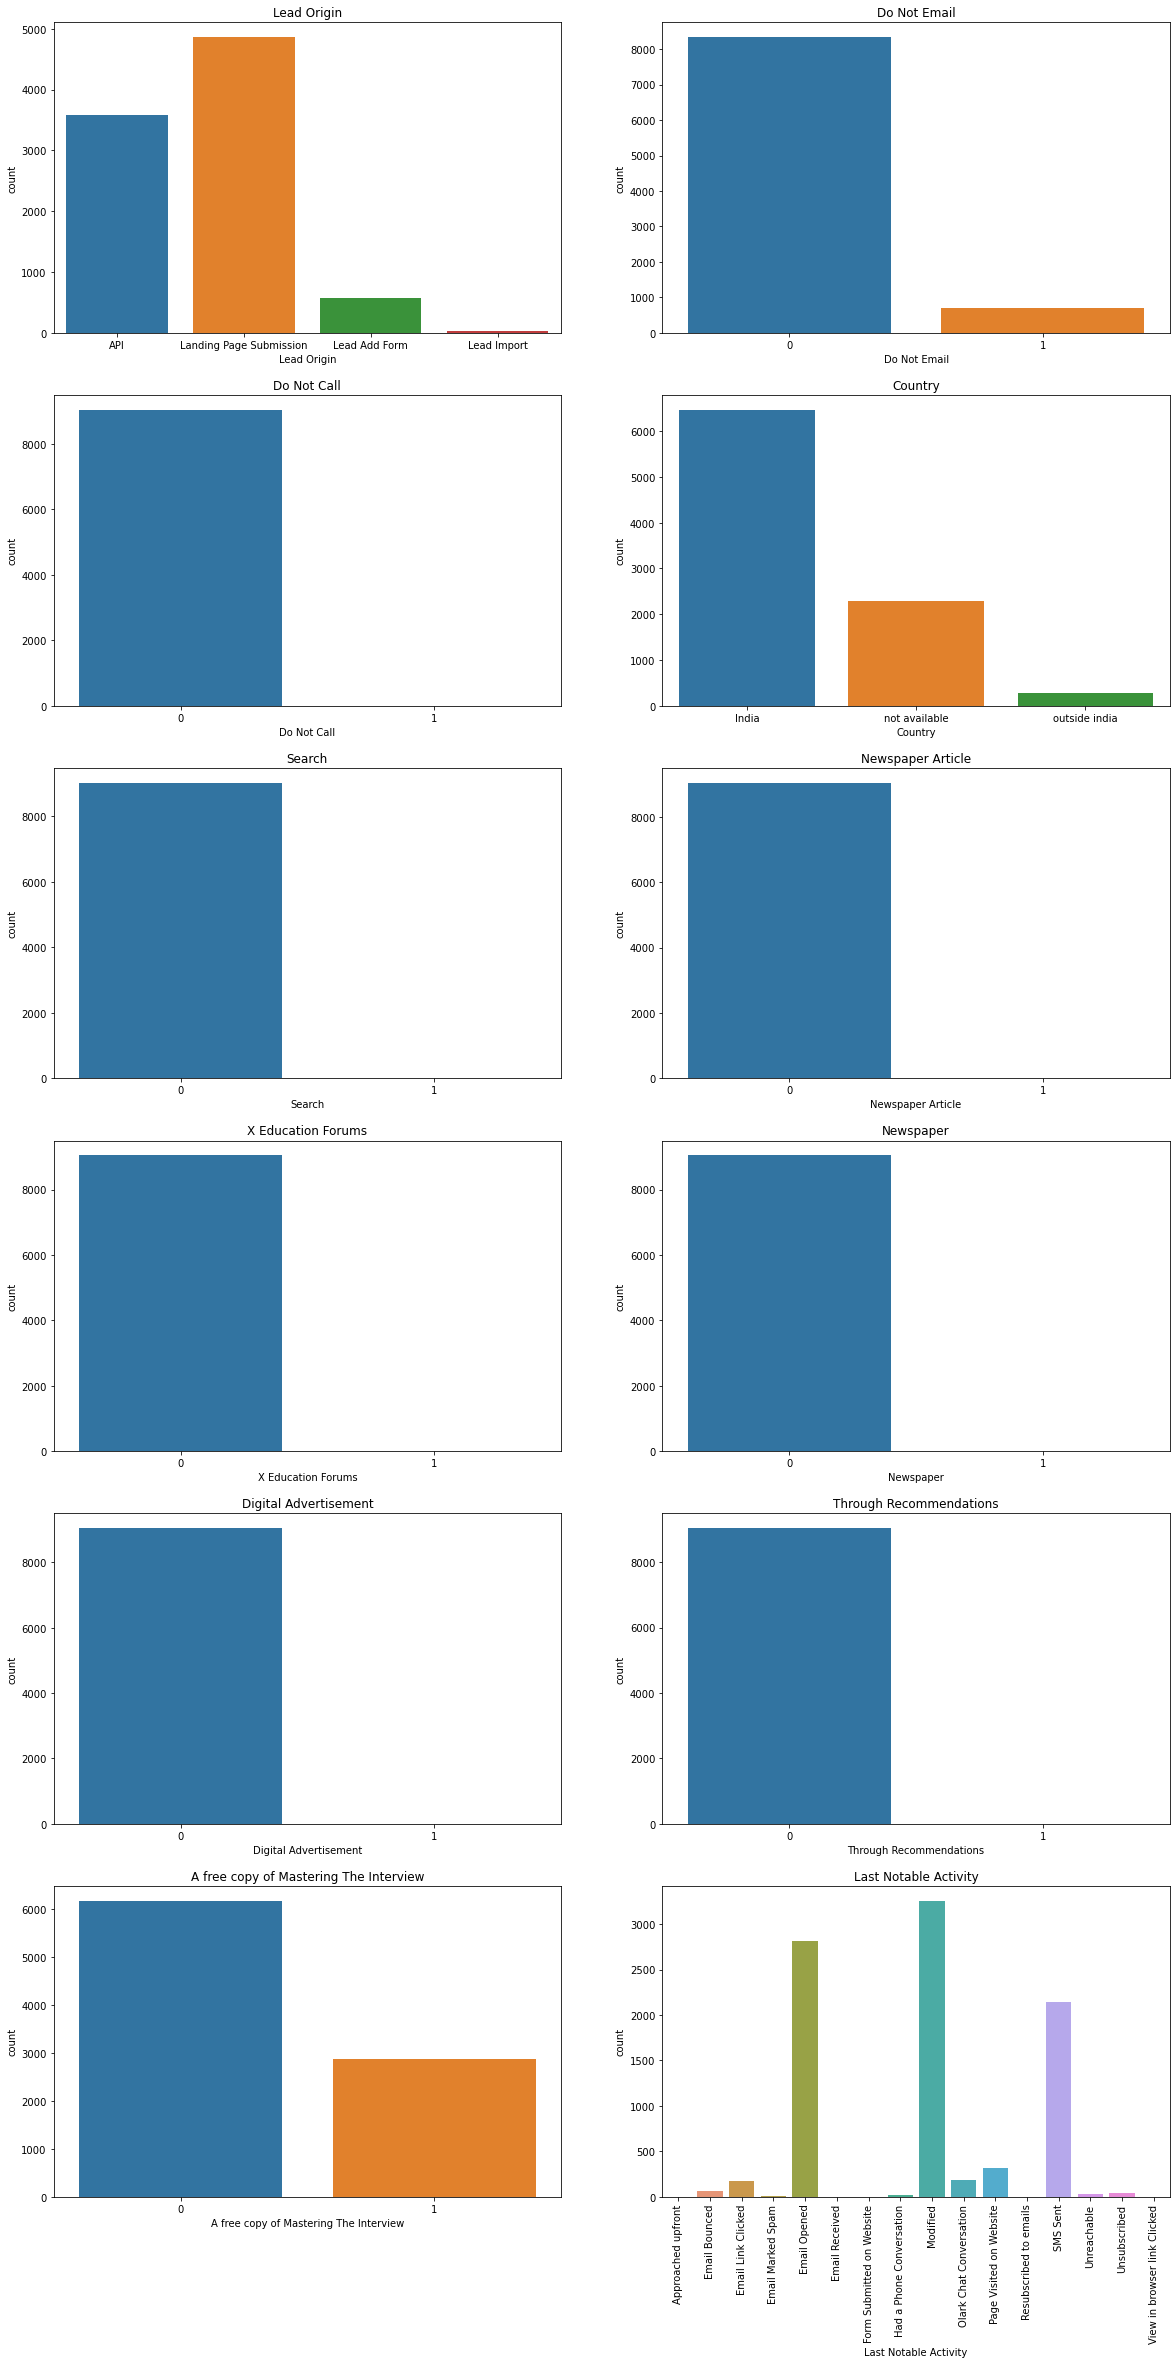

In [38]:
# Plotting graph
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(leads_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leads_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leads_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leads_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leads_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leads_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leads_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leads_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leads_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leads_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leads_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leads_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()


#### 1. We can see that the lead was identified the most by 'Landing Page Submission'.
#### 2. We can see that people do not want to be called and only little want to be e-mailed.
#### 3. We can see that none of the people have seen any ads.
#### 4. We can see that people like a free copy of mastering the Interview.
#### 5. We can see that the last notable activity are Modified,Email opened and SMS Sent.

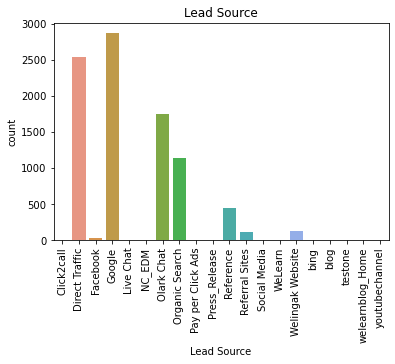

In [39]:
# Plotting Lead Source
sns.countplot(leads_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### We see that most of the lead come from google, direct traffic, olark chat and organic search.

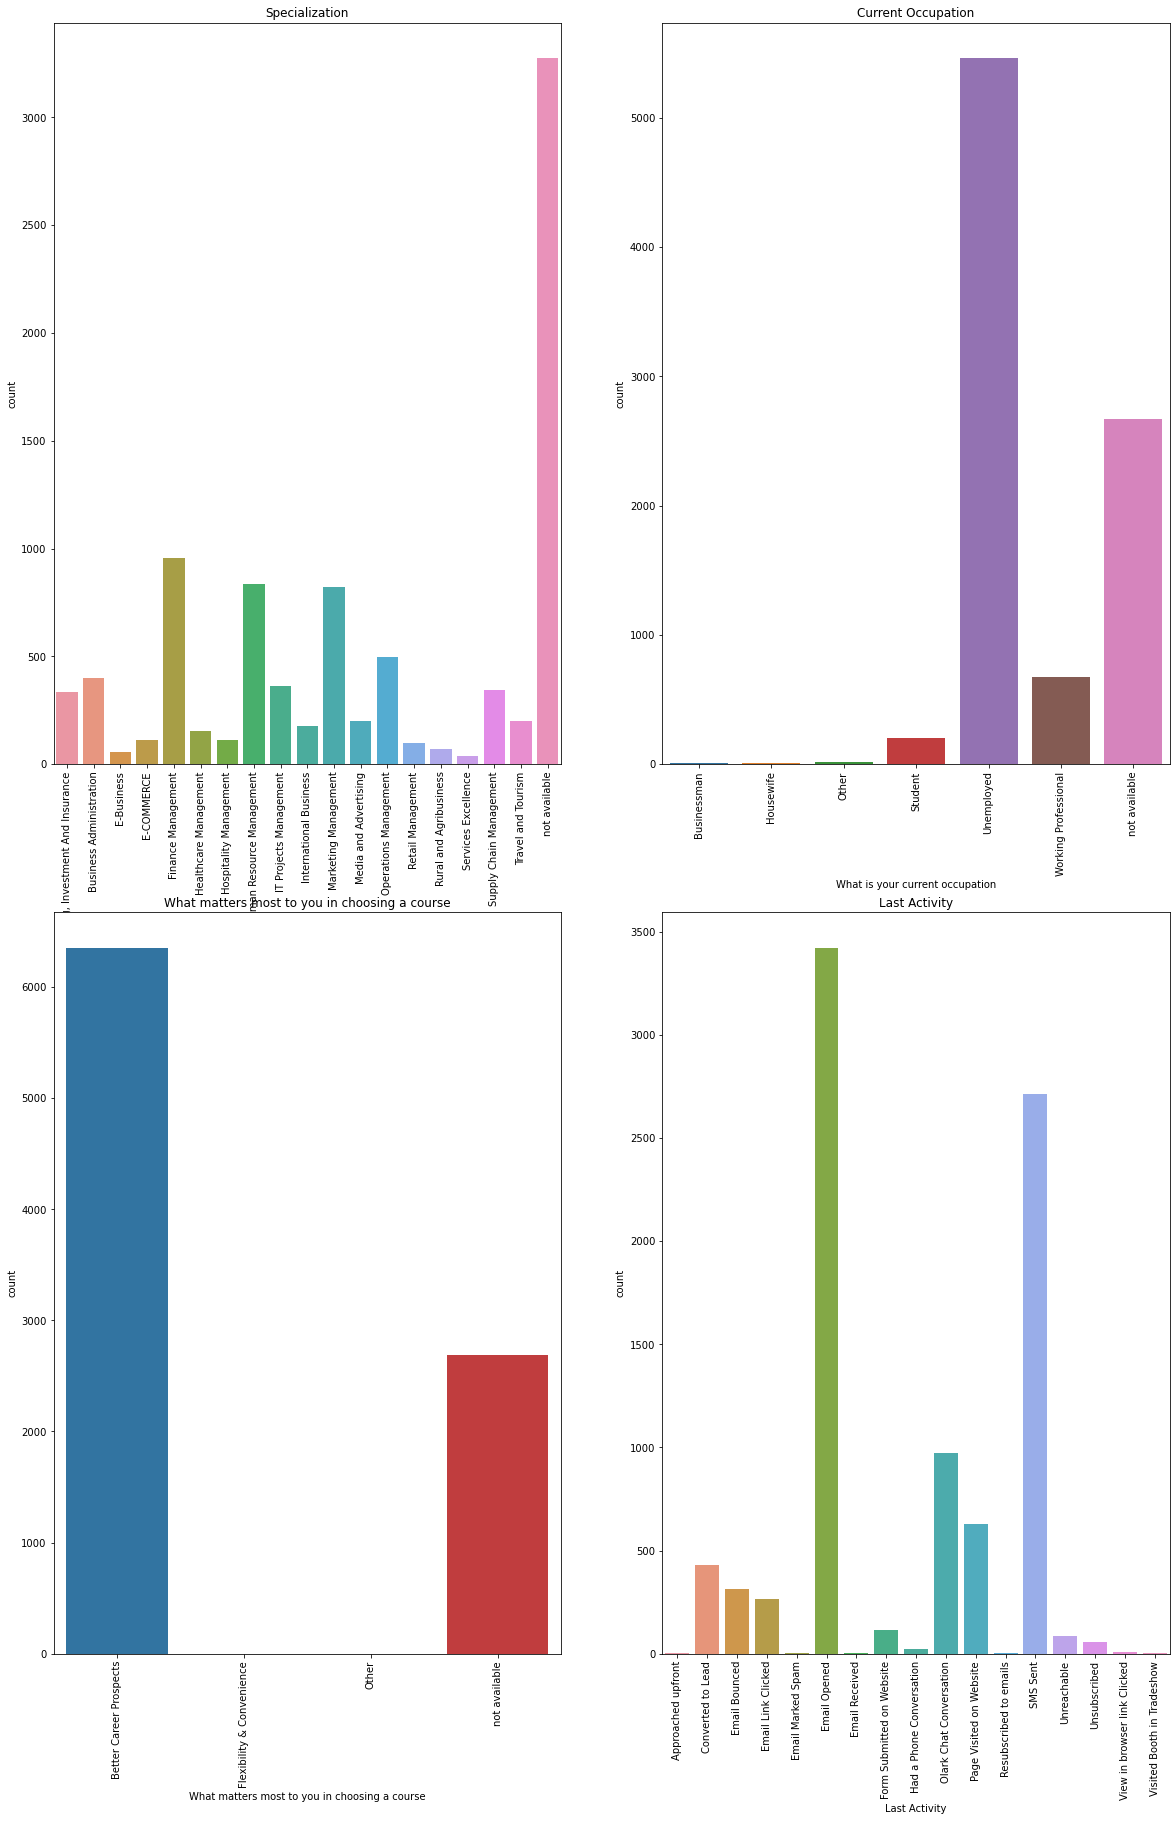

In [40]:
# Plotting graph
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(leads_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(leads_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(leads_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(leads_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()


#### 1. Most people specilize in Finance Management, H.R Management, Marketing Management and Operations Management.
#### 2. Most people looking for the courses are Unemployed then next are Working Professional and some are students.
#### 3. We see that all people are looking for better carrer prospects.
#### 4. We see that last activity are Email opened, SMS Sent, Olark Chat and Page visited on website.

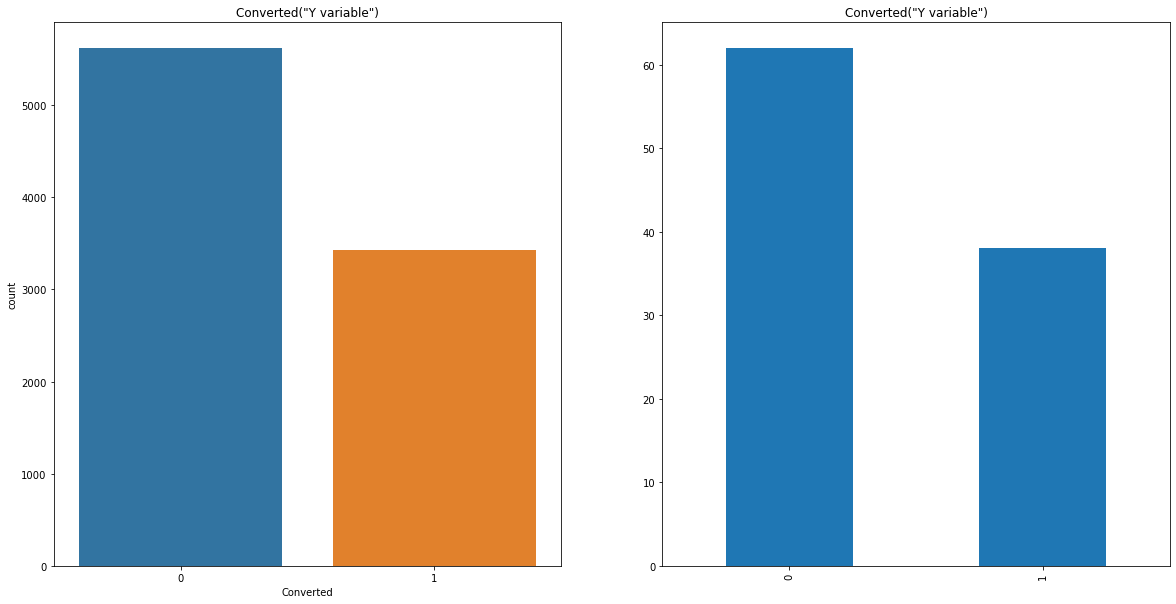

In [41]:
# Checking the Converted Column.
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sns.countplot(leads['Converted'])
plt.title('Converted("Y variable")')

plt.subplot(1,2,2)
(round(leads['Converted'].value_counts(normalize=True),2)*100).plot.bar()
plt.title('Converted("Y variable")')
plt.show()


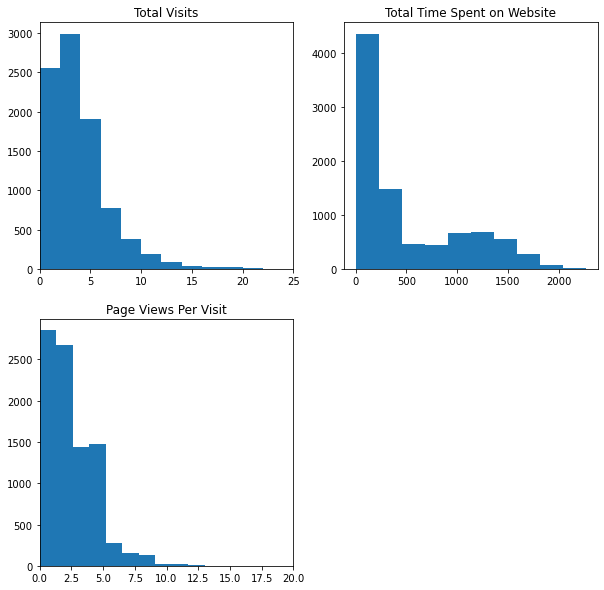

In [42]:
# Binning the numeric variables.
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.hist(leads_final['TotalVisits'], bins = 15)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
plt.hist(leads_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
plt.hist(leads_final['Page Views Per Visit'], bins = 10)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()


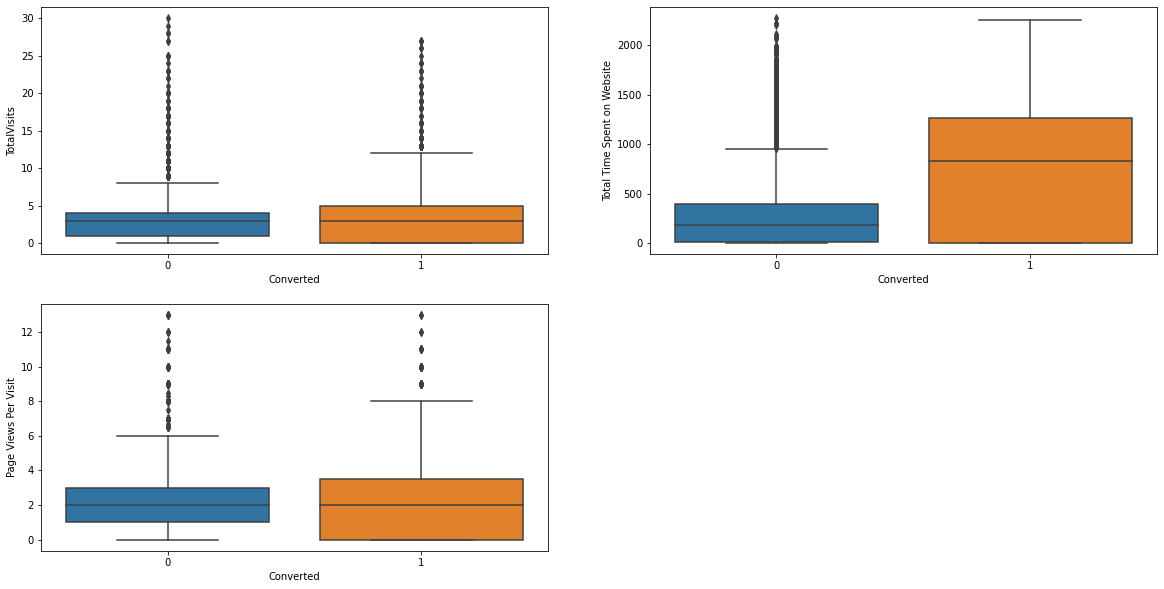

In [43]:
##  Numerical variables vs Converted column
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(data=leads_final,x='Converted',y='TotalVisits')
plt.subplot(2,2,2)
sns.boxplot(data=leads_final,x='Converted',y='Total Time Spent on Website')
plt.subplot(2,2,3)
sns.boxplot(data=leads_final,x='Converted',y='Page Views Per Visit')
plt.show()

#### We can see that the max for Converted is higher than not converted.

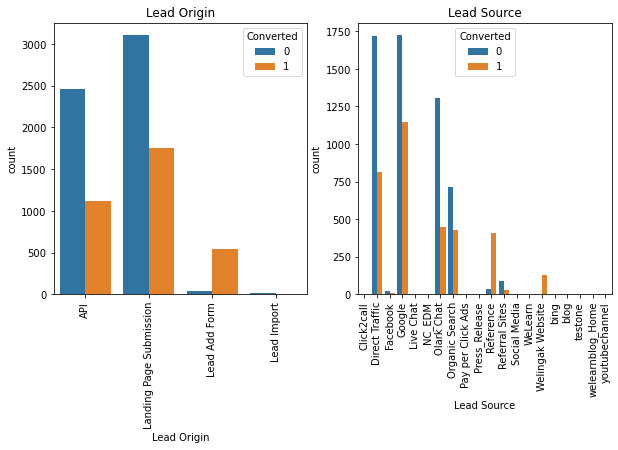

In [44]:
# Comparing all the categorical variables to Converted
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

#### We can see that lead identified from lead add form have more converted rate than non conversion.

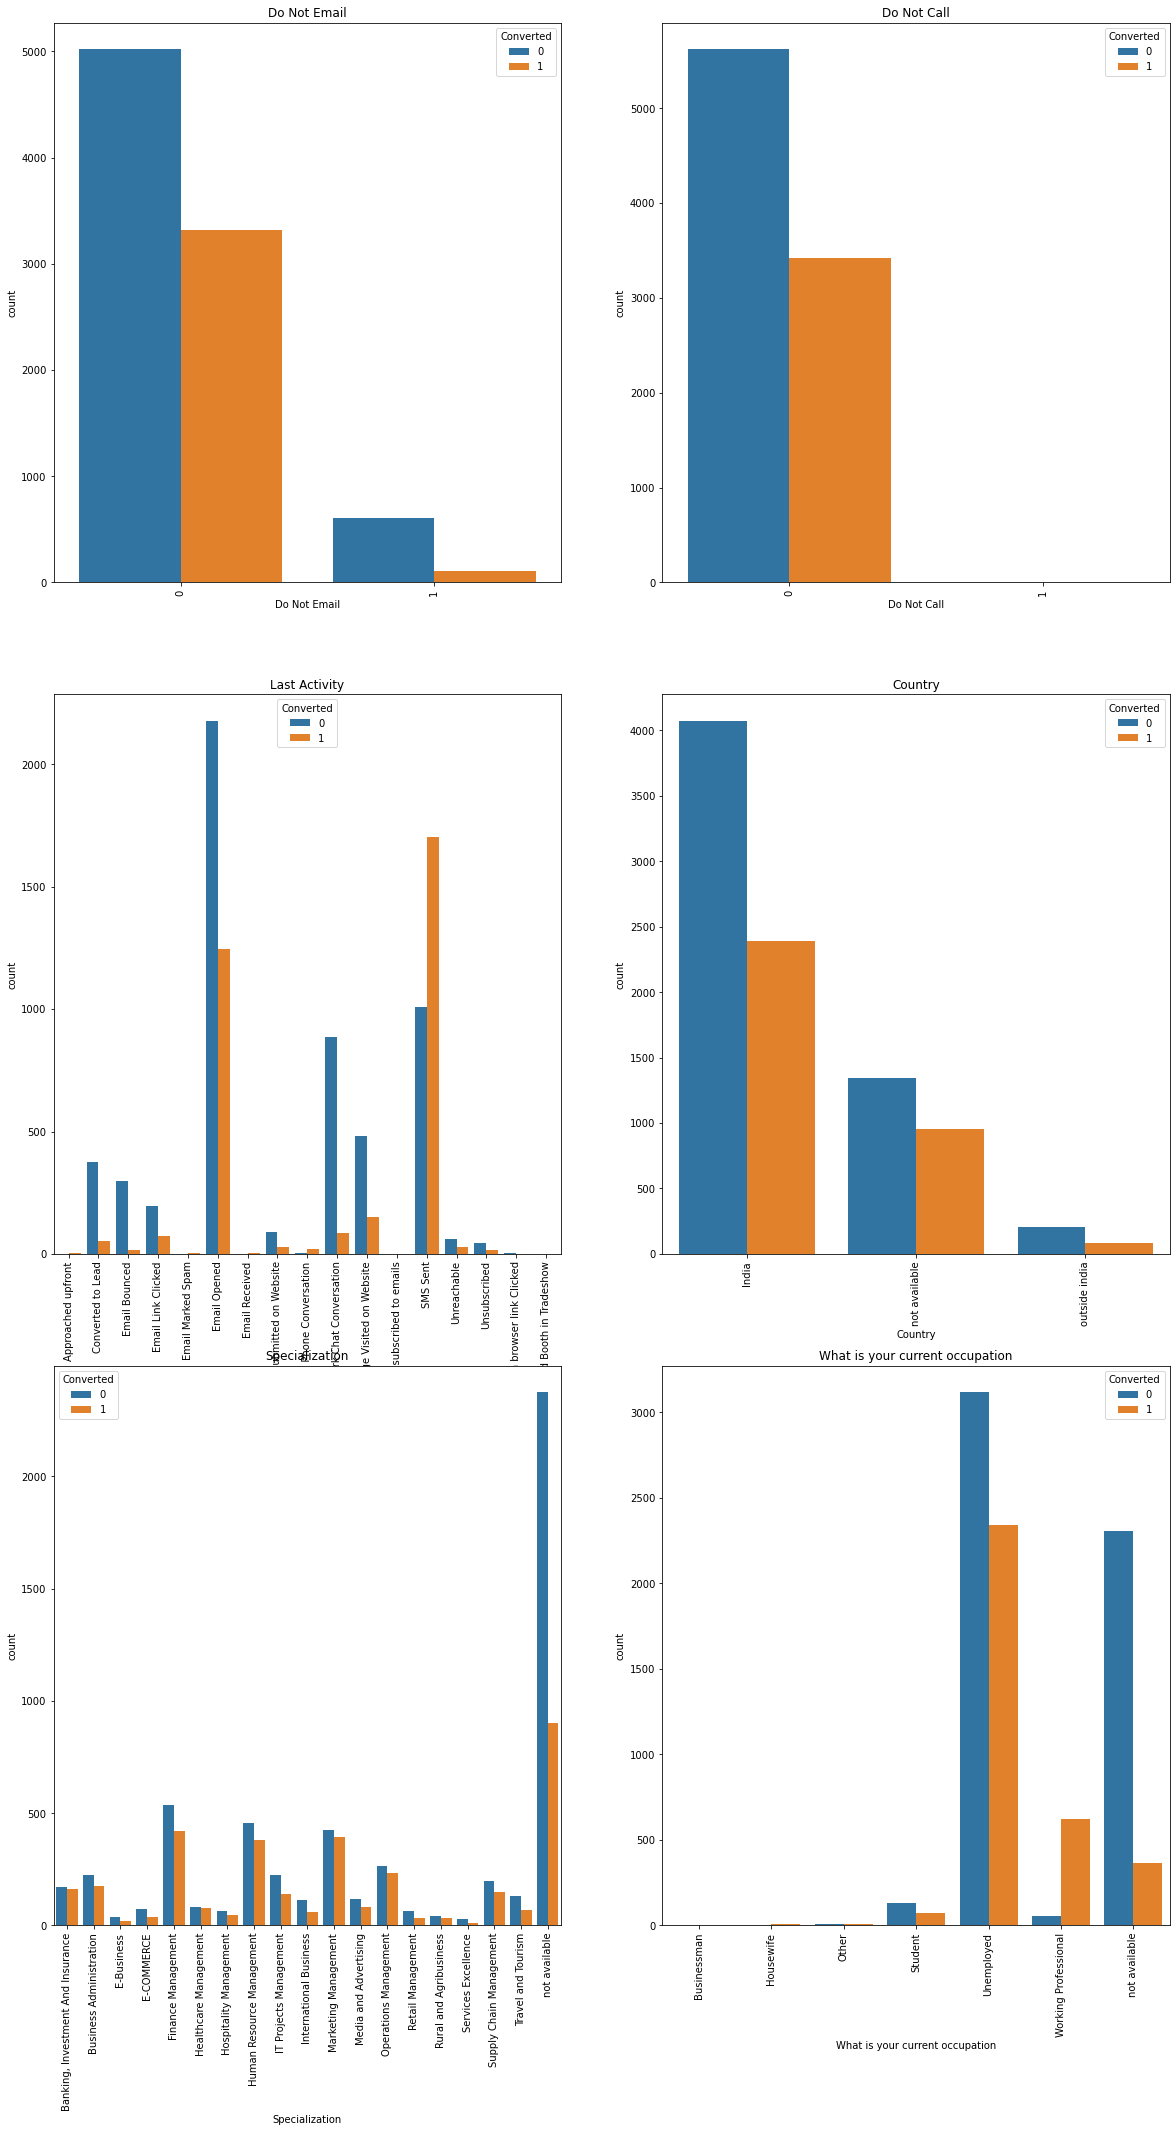

In [45]:
# Plotting graph
plt.figure(figsize = (20,35))

plt.subplot(3,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(3,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.subplot(3,2,3)
sns.countplot(x='Last Activity', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(3,2,4)
sns.countplot(x='Country', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.subplot(3,2,5)
sns.countplot(x='Specialization', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(3,2,6)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()


#### 1. In last activity SMS Sent have more 1 than Email Opened.
#### 2. Almost all customers come from India.
#### 3. Working Professional have higher Conversion rate.

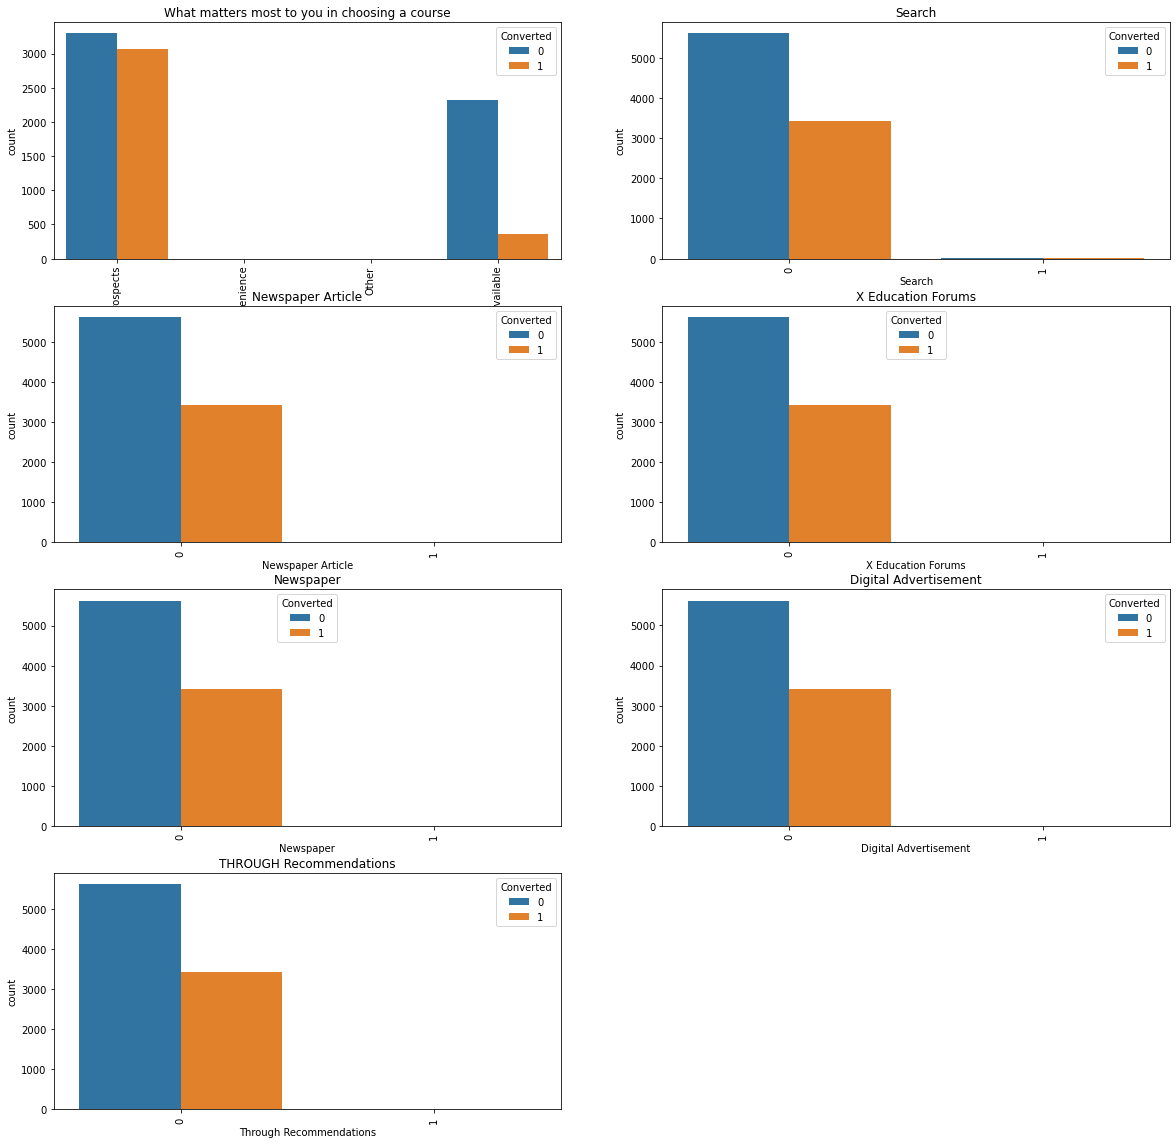

In [46]:
# Plotting graph
plt.figure(figsize = (20,20))

plt.subplot(4,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(4,2,2)
sns.countplot(x='Search', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.subplot(4,2,3)
sns.countplot(x='Newspaper Article', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(4,2,4)
sns.countplot(x='X Education Forums', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(4,2,5)
sns.countplot(x='Newspaper', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(4,2,6)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(4,2,7)
sns.countplot(x='Through Recommendations', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('THROUGH Recommendations')

plt.show()



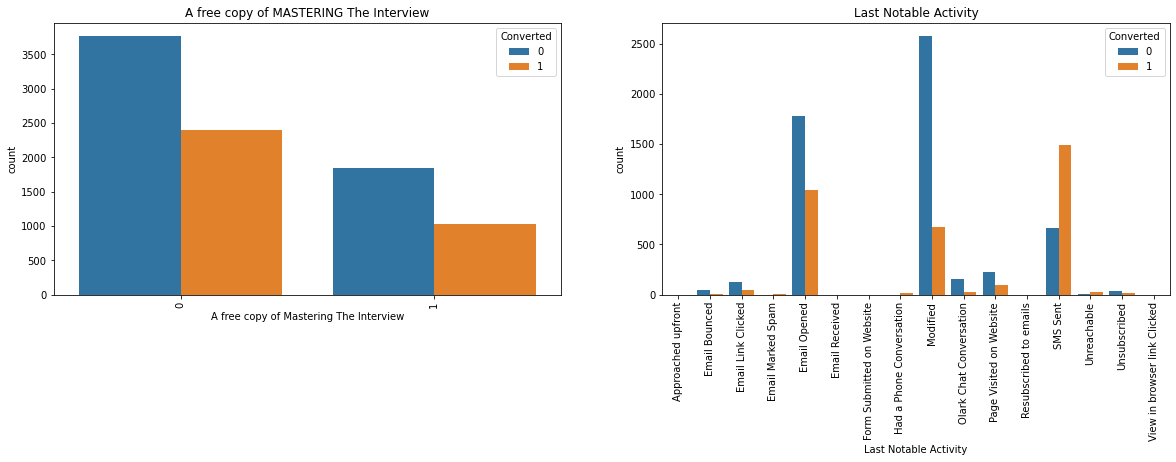

In [47]:
# Plotting graph
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of MASTERING The Interview')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()


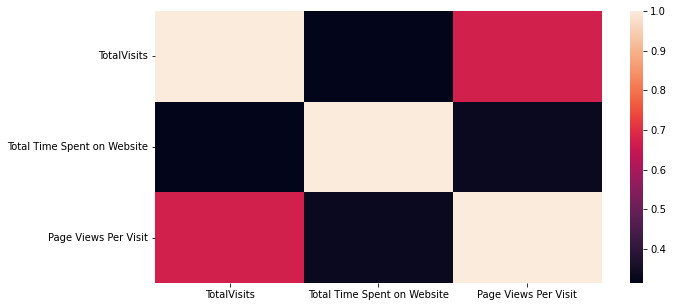

In [48]:
# To check the correlation among numeric varibles
plt.figure(figsize=(10,5))
sns.heatmap(leads_final.corr())
plt.show()


#### We can see that TotalVisits and Page Views Per Visits are correlated.

In [49]:
leads_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9046 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   Lead Origin                                    9046 non-null   category
 1   Lead Source                                    9046 non-null   category
 2   Do Not Email                                   9046 non-null   category
 3   Do Not Call                                    9046 non-null   category
 4   Converted                                      9046 non-null   category
 5   TotalVisits                                    9046 non-null   float64 
 6   Total Time Spent on Website                    9046 non-null   int64   
 7   Page Views Per Visit                           9046 non-null   float64 
 8   Last Activity                                  9046 non-null   category
 9   Country                                  

## Model Building

In [50]:
## CREATE dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_final[['Lead Origin','Specialization' ,'Lead Source', 'Last Activity',
                                    'What is your current occupation','A free copy of Mastering The Interview',
                                    'Last Notable Activity']], drop_first=True)
# Add the results to the Main Dataset
leads_final = pd.concat([leads_final, dummy], axis=1)
leads_final


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_not available,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What is your current occupation_not available,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,not available,not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,India,not available,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [51]:
leads_final = leads_final.drop(['What is your current occupation_not available','Lead Origin', 'Lead Source', 
                                 'Do Not Call','Last Activity', 'Country', 'Specialization', 
                                'Specialization_not available','What is your current occupation',
                                'What matters most to you in choosing a course', 'Search','Newspaper Article',
                                'X Education Forums','Magazine', 'Newspaper','Digital Advertisement',
                                'Through Recommendations','Receive More Updates About Our Courses',
                                'Update me on Supply Chain Content','Get updates on DM Content',
                                'I agree to pay the amount through cheque',
                                'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leads_final

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9236,0,0,2.0,238,2.00,1,0

In [52]:
X = leads_final.drop(['Converted'], 1)
X.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
y = leads_final['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [54]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [56]:
# Scale the three numeric features
scaler = MinMaxScaler() 
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_1,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8820,1,0.233333,0.077465,0.538462,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4729,0,0.133333,0.065141,0.307692,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4289,0,0.100000,0.006162,0.230769,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4243,0,0.300000,0.467870,0.230769,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5260,0,0.566667,0.382482,0.093077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [57]:
### Checking the Converted Rate
Converted_rate = (sum(leads_final['Converted'])/len(leads_final['Converted'].index))*100
Converted_rate

37.87309307981428

### We have almost 38% conversion rate

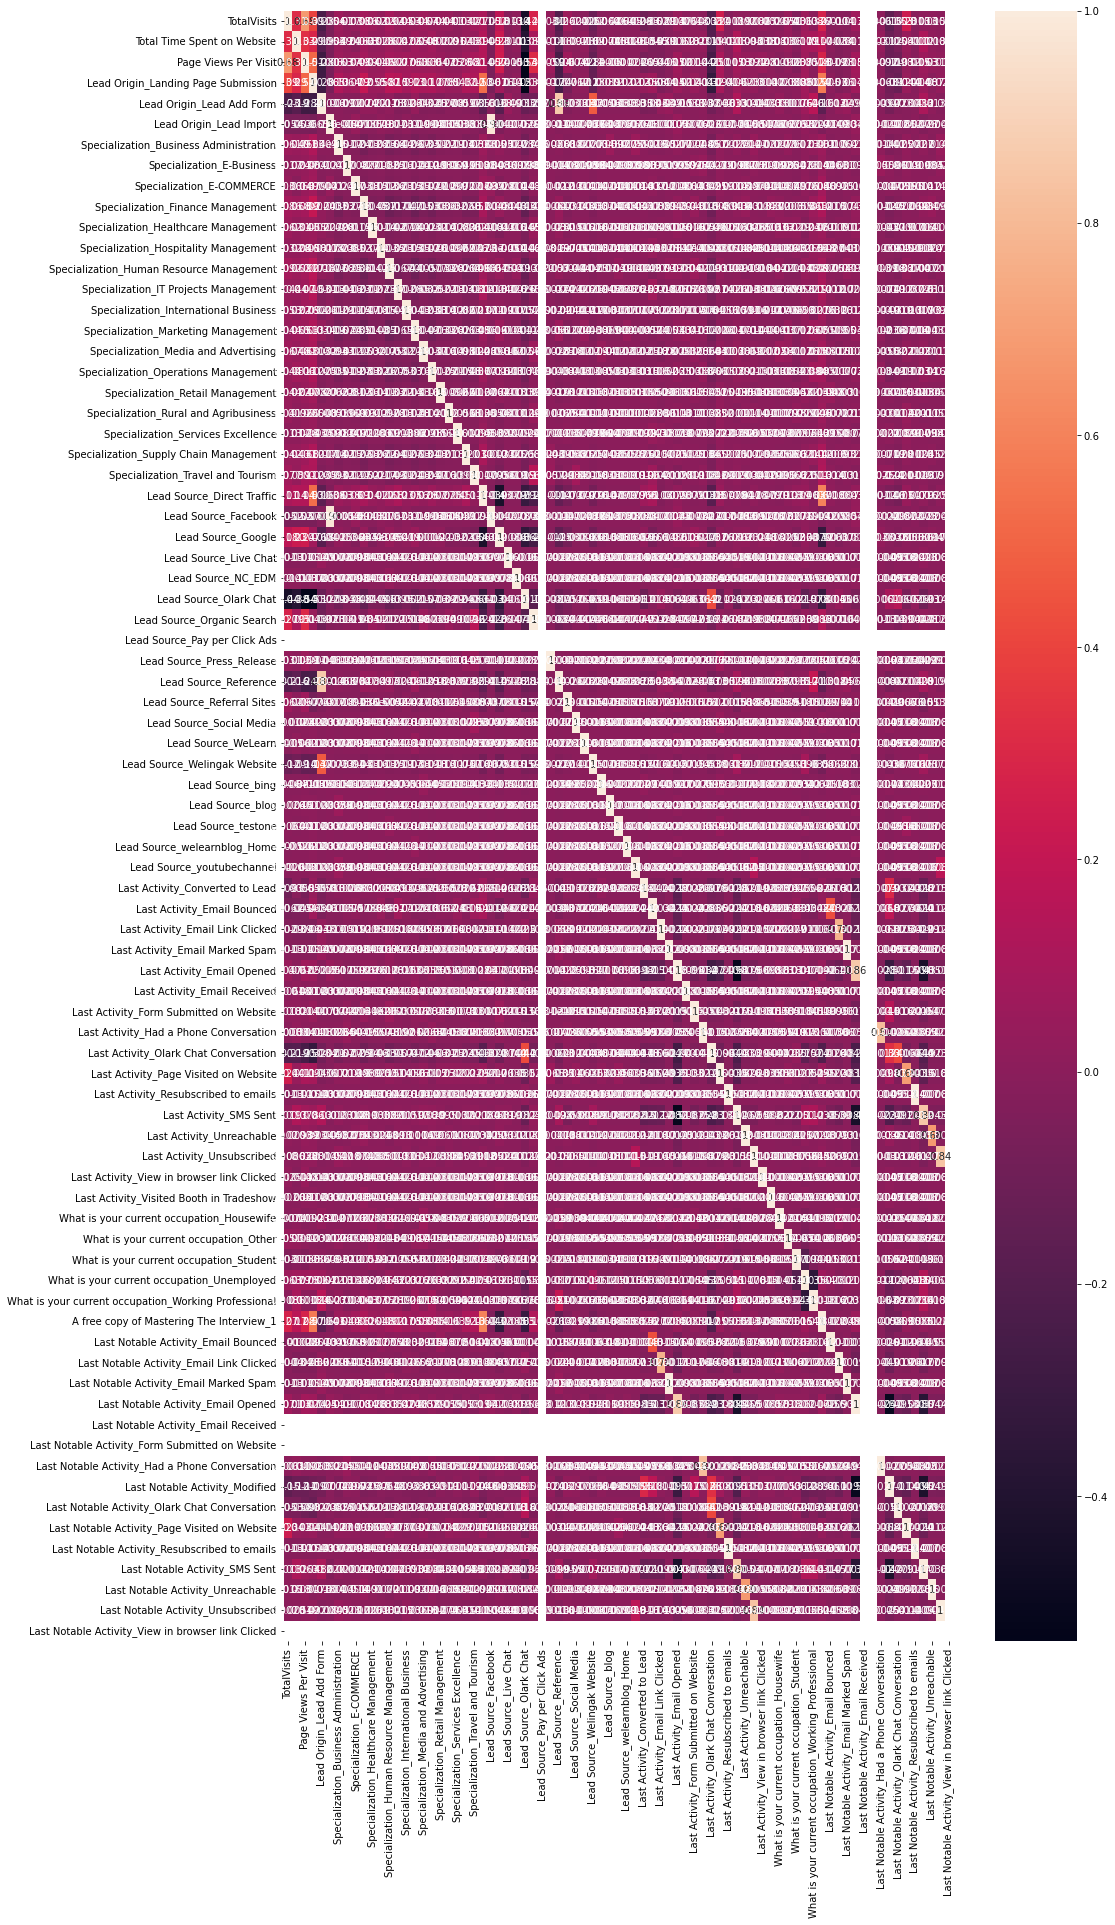

In [58]:
# To check the correlation among varibles
plt.figure(figsize=(15,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()
# We cannot see anything in heatmap due to many variables.

In [59]:
# Initialising LogisticRegression 
logreg = LogisticRegression()

In [60]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [61]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 24),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Specialization_Business Administration', False, 30),
 ('Specialization_E-Business', False, 22),
 ('Specialization_E-COMMERCE', False, 27),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 44),
 ('Specialization_Human Resource Management', False, 32),
 ('Specialization_IT Projects Management', False, 29),
 ('Specialization_International Business', False, 36),
 ('Specialization_Marketing Management', False, 28),
 ('Specialization_Media and Advertising', False, 35),
 ('Specialization_Operations Management', False, 23),
 ('Specialization_Retail Management', False, 62),
 ('Specialization_Rural and Agribusiness', False,

In [62]:
# Columns selected by RFE are in the variable 'col'
col = X_train.columns[rfe.support_]

In [63]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [64]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6332
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Mon, 17 Apr 2023   Deviance:                       5285.5
Time:                        04:20:22   Pearson chi2:                 6.26e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3898
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3276      0.096    -24.150      0.000      -2.517      -2.139
Do Not Email                                            -1.4103      0.174     -8.125      0.000      -1.751      -1.070
TotalVisits                                              1.8447      0.361      5.106      0.000       1.137       2.553
Total Time Spent on Website                              4.4952      0.168     26.706      0.000       4.165       4.825
Lead Origin_Lead Add Form                                2.7541      0.242     11.372      0.000       2.279       3.229
Lead Source_Direct Traffic                              -1.5371      0.121    -12.707      0.000      -1.774      -1.300
Lead Source_Google                                      -1.2678      0.118    -10.721      0.000      -1.500      -1.036
Lead Source_Organic Search                              -1.3860      0.146     -9.498      0.000      -1.672      -1.100
Lead Source_Referral Sites                              -1.6030      0.347     -4.621      0.000      -2.283      -0.923
Lead Source_Welingak Website                             2.2199      1.036      2.142      0.032       0.189       4.251
Last Activity_Had a Phone Conversation                   2.3086      0.914      2.527      0.012       0.518       4.099
Last Activity_SMS Sent                                   1.4763      0.074     19.955      0.000       1.331       1.621
What is your current occupation_Housewife               24.2709   1.57e+04      0.002      0.999   -3.08e+04    3.08e+04
What is your current occupation_Unemployed               1.2675      0.083     15.318      0.000       1.105       1.430
What is your current occupation_Working Professional     3.6556      0.190     19.258      0.000       3.284       4.028
Last Notable Activity_Unreachable                        2.1243      0.538      3.945      0.000       1.069       3.180
========================================================================================================================
"""

In [65]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.91
5,Lead Source_Google,2.71
12,What is your current occupation_Unemployed,2.57
4,Lead Source_Direct Traffic,2.45
2,Total Time Spent on Website,2.37
6,Lead Source_Organic Search,1.91
3,Lead Origin_Lead Add Form,1.62
10,Last Activity_SMS Sent,1.51
8,Lead Source_Welingak Website,1.33
13,What is your current occupation_Working Profes...,1.32


In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8820    0.167775
4729    0.113202
4289    0.287263
4243    0.552403
5260    0.607544
5459    0.884448
1603    0.511223
5150    0.329855
339     0.148078
2100    0.257285
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16777523, 0.11320157, 0.28726345, 0.55240281, 0.60754394,
       0.88444766, 0.51122311, 0.32985483, 0.14807754, 0.25728477])

In [68]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,CustID
0,0,0.167775,8820
1,0,0.113202,4729
2,0,0.287263,4289
3,0,0.552403,4243
4,0,0.607544,5260


In [69]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted
0,0,0.167775,8820,0
1,0,0.113202,4729,0
2,0,0.287263,4289,0
3,0,0.552403,4243,1
4,0,0.607544,5260,1


In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  468]
 [ 750 1660]]


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8076437144662034


### We have obtained 80% accuracy.

In [72]:
# Dropping due to high p-value
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [73]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6332
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2653.2
Date:                Mon, 17 Apr 2023   Deviance:                       5306.5
Time:                        04:20:22   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3078      0.096    -24.088      0.000      -2.496      -2.120
Do Not Email                                            -1.4154      0.173     -8.160      0.000      -1.755      -1.075
TotalVisits                                              1.8152      0.361      5.033      0.000       1.108       2.522
Total Time Spent on Website                              4.4933      0.168     26.753      0.000       4.164       4.822
Lead Origin_Lead Add Form                                2.7994      0.242     11.561      0.000       2.325       3.274
Lead Source_Direct Traffic                              -1.5246      0.121    -12.634      0.000      -1.761      -1.288
Lead Source_Google                                      -1.2552      0.118    -10.641      0.000      -1.486      -1.024
Lead Source_Organic Search                              -1.3617      0.145     -9.362      0.000      -1.647      -1.077
Lead Source_Referral Sites                              -1.5959      0.346     -4.607      0.000      -2.275      -0.917
Lead Source_Welingak Website                             2.1841      1.036      2.107      0.035       0.153       4.215
Last Activity_Had a Phone Conversation                   2.3000      0.912      2.522      0.012       0.512       4.088
Last Activity_SMS Sent                                   1.4673      0.074     19.866      0.000       1.323       1.612
What is your current occupation_Unemployed               1.2424      0.082     15.124      0.000       1.081       1.403
What is your current occupation_Working Professional     3.6293      0.190     19.151      0.000       3.258       4.001
Last Notable Activity_Unreachable                        2.1110      0.538      3.925      0.000       1.057       3.165
========================================================================================================================
"""

In [74]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [75]:
y_train_pred[:10]

array([0.16747679, 0.11352727, 0.28630042, 0.55471552, 0.60812385,
       0.88598576, 0.51186469, 0.32905274, 0.14861733, 0.25628969])

In [76]:
# Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,CustID
0,0,0.167477,8820
1,0,0.113527,4729
2,0,0.286300,4289
3,0,0.554716,4243
4,0,0.608124,5260


In [77]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted
0,0,0.167477,8820,0
1,0,0.113527,4729,0
2,0,0.286300,4289,0
3,0,0.554716,4243,1
4,0,0.608124,5260,1


In [78]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3453  469]
 [ 754 1656]]


In [79]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8068540745420089


In [80]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.91
5,Lead Source_Google,2.71
11,What is your current occupation_Unemployed,2.56
4,Lead Source_Direct Traffic,2.45
2,Total Time Spent on Website,2.36
6,Lead Source_Organic Search,1.91
3,Lead Origin_Lead Add Form,1.61
10,Last Activity_SMS Sent,1.51
8,Lead Source_Welingak Website,1.33
12,What is your current occupation_Working Profes...,1.32


### Our accuracy is still 80%.
### The p-value is below 0.05 and VIF under 3.

## Metrics beyond simply accuracy

In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6871369294605809

In [83]:
# Let us calculate specificity
TN / float(TN+FP)

0.8804181540030597

In [84]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11958184599694034


In [85]:
# positive predictive value 
print (TP / float(TP+FP))

0.7792941176470588


In [86]:
# Negative predictive value
print (TN / float(TN+ FN))

0.820774898977894


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [87]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [88]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

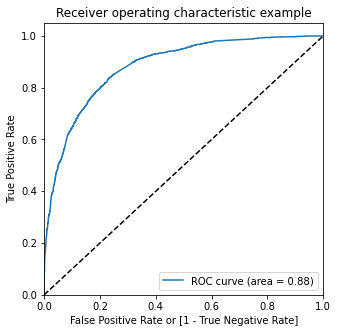

In [89]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The area under ROC curve is 0.88.

### Finding Optimal Cutoff Point

In [90]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.167477,8820,0,1,1,0,0,0,0,0,0,0,0
1,0,0.113527,4729,0,1,1,0,0,0,0,0,0,0,0
2,0,0.286300,4289,0,1,1,1,0,0,0,0,0,0,0
3,0,0.554716,4243,1,1,1,1,1,1,1,0,0,0,0
4,0,0.608124,5260,1,1,1,1,1,1,1,1,0,0,0


In [91]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380606  1.000000  0.000000
0.1   0.1  0.622710  0.975519  0.405915
0.2   0.2  0.746210  0.917427  0.640999
0.3   0.3  0.795325  0.832780  0.772310
0.4   0.4  0.805433  0.760166  0.833248
0.5   0.5  0.806854  0.687137  0.880418
0.6   0.6  0.791219  0.570954  0.926568
0.7   0.7  0.775426  0.489212  0.951300
0.8   0.8  0.753474  0.404979  0.967619
0.9   0.9  0.712413  0.264315  0.987761


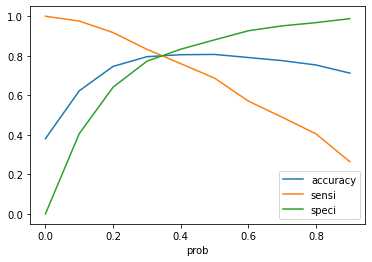

In [92]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [93]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.167477,8820,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.113527,4729,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.286300,4289,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.554716,4243,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.608124,5260,1,1,1,1,1,1,1,1,0,0,0,1


In [94]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8005369551484524

In [95]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3161,  761],
       [ 502, 1908]], dtype=int64)

In [96]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [97]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.791701244813278

In [98]:
# Let us calculate specificity
TN / float(TN+FP)

0.8059663437021928

In [99]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19403365629780725


In [100]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7148744848257774


In [101]:
# Negative predictive value
print (TN / float(TN+ FN))

0.862953862953863


## Precision and Recall

In [102]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3453,  469],
       [ 754, 1656]], dtype=int64)

##### Precision
TP / TP + FP

In [103]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7792941176470588

##### Recall
TP / TP + FN

In [104]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6871369294605809

### Precision and recall tradeoff

In [105]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

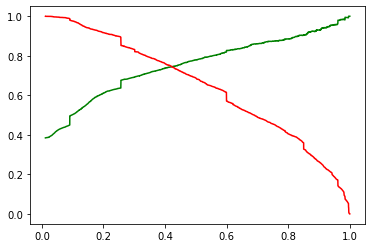

In [106]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### We have obtained 0.41 as precision-recall optimal cutoff.

### Making predictions on the test set

In [107]:
# Scaling the numeric variables in test data
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [108]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
1320,0,0.100000,0.009243,0,1,0,0,0,0,0,0,1,0,0
97,0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0
3413,0,0.066667,0.033011,0,0,1,0,0,0,0,0,0,0,0
6166,0,0.133333,0.417694,0,1,0,0,0,0,0,1,1,0,0
7990,0,0.166667,0.411532,0,0,0,1,0,0,0,0,0,0,0


In [109]:
# adding constant
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [110]:
y_test_pred = res.predict(X_test_sm)

In [111]:
y_test_pred[:10]

1320    0.085733
97      0.256290
3413    0.035789
6166    0.730314
7990    0.179776
4772    0.996272
2765    0.996272
868     0.373554
7252    0.428083
1984    0.045216
dtype: float64

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [113]:
# Let's see the head
y_pred_1.head()

,0
1320,0.085733
97,0.256290
3413,0.035789
6166,0.730314
7990,0.179776


In [114]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [115]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [116]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [118]:
y_pred_final.head()

,Converted,CustID,0
0,0,1320,0.085733
1,0,97,0.256290
2,0,3413,0.035789
3,1,6166,0.730314
4,0,7990,0.179776


In [119]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [120]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_prob'], axis=1)

In [121]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_prob
0,1320,0,0.085733
1,97,0,0.256290
2,3413,0,0.035789
3,6166,1,0.730314
4,7990,0,0.179776


In [122]:
# Using precision-recall optimum cutoff.
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.41 else 0)

In [123]:
y_pred_final.head()

,CustID,Converted,Converted_prob,final_predicted
0,1320,0,0.085733,0
1,97,0,0.256290,0
2,3413,0,0.035789,0
3,6166,1,0.730314,1
4,7990,0,0.179776,0


### Accuracy of the test set

In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.813927781871776

In [125]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1425,  273],
       [ 232,  784]], dtype=int64)

In [126]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7716535433070866

#### Specificity

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.8392226148409894

#### Precision Score

In [129]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7417218543046358

#### Recall Score

In [130]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7716535433070866

#### With 0.41 as the cut-off, we have obtained 81% Accuracy, 74% Precision and 77% Recall Score

# Conclusion

* The top four significant variables are:
1. Total Time Spent on Website 
2. What is your current occupation_Working Professional 
3. Lead Origin_Lead Add Form
4. Last Activity_Had a Phone Conversation
*  We have obtained on the test dataset: 
1. Accuracy: 81% 
2. Sesitivity: 77%
3. Specificity: 83%
4. Precision: 74% 
5. Recall Score: 77%
* Total Time Spent on Website has the highest coefficient value = 4.4
* The company has to focus on the significants variables to increase the lead conversion percentage.
* The company can also check the problems with ads since most of the customers have not seen the ads in any platform and thereby they are not performing.